# Sympy tutorial

Import sympy, and force pretty print unicode results

In [14]:
from sympy import *
init_printing(use_unicode=True)  #prints nice unicode outputs

In sympy, variables are symbols, must be declared by this function, and are not directly evaluated.

In [72]:
x,y,z,a,b = symbols("x y z a b")   
type(x)

sympy.core.symbol.Symbol

symbolic expression can be assigned to python variables

In [16]:
a = (x + 1)**2
b = x**2 + 2*x + 1
simplify(a - b)  #used to simplify results. see below, Simplify section

In [17]:
c = x**2 - 2*x + 1
a - c
#example of not simplify()'ed result

Be careful! exponent notations is (as in python) logic XOR!! use double star.

In [18]:
x^y

normal fractions are evaluated as floats, by forcing numbers into Sympy Integers, you can create Rationals,or just declare them directly.

In [19]:
type(1/3), 1/3 

(float, 0.3333333333333333)

In [20]:
type(Integer(1)/Integer(3)), Integer(1)/Integer(3) 

(sympy.core.numbers.Rational, 1/3)

In [21]:
Rational(10,44) 

Substitutions. Use .subs(arg1, arg2) to substitute expressions with other subexpression, and to evaluate. Subs returns a new expression, does not modify it in-place, because *SymPy objects are IMMUTABLE*. To perform multiple substitutions, pass a list of [(old, new), (old, new)], that are applied in order (see below).


In [22]:
expr = x**y
expr

In [23]:
expr = expr.subs(y,4*x**2)
expr

In [24]:
expr = expr.subs(x,2)
expr

In [26]:
expr = x**y
expr.subs([(x, 3*x+2*y), (y, cos(y))])

In [28]:
expr = x**y
expr.subs([(y, cos(y)), (x, 3*x+2*y)])  #reversed order, the first y is not changed

with sympify() you can convert a string in a simpy expression. 

BE VERY CAREFUL!! sympify uses eval(). NEVER use it on unsanitized input! (i.e. eval() can  import os, access to the kernel, segfault the C interpreter, and create any kind of possible damage)

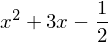

In [29]:
str_exp = "x**2 + 3*x - 1/2"
expr = sympify(str_exp)
expr

To evaluate numerical expressions into floats, use .evalf(n), where n is the number of decimals (default n=15)

In [30]:
expr = sqrt(8)
expr

In [31]:
expr.evalf()

In [32]:
expr.evalf(50)

# lambdify()

While subs() and .evalf() are good for simple evaluations, you will need to evaluate your expression in many points. Doing it in Sympy is slow and painful, and lambdify can convert your symbolic  sympy expression into something that can be actually evaluated, usually in Numpy or Scipy.

The example below uses numpy. You can use other libraries, i.e. the standard "Math".

(NOTE! Also lambdify uses eval(). Never use on unsantized input!)

In [33]:
import numpy
a = numpy.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
expr = sin(x)
expr

In [35]:
f = lambdify(x, expr, "numpy")
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

# Pretty Printing

Just use the init_printing() function. MathJax LaTeX is used in notebooks, while common unicode will be used in consoles, if available.

A useful command is init_session(), that as you can read below, start init_printing() after importing libraries and initializing some common symbols.

In [36]:
init_session()

IPython console for SymPy 1.2 (Python 3.7.0-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



fun thing: there is also an ASCII pretty printer, that you do not want, probably:

In [37]:
pprint(Integral(sqrt(1/x), x), use_unicode=False)

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


To retrieve LaTeX markup, you can use print(latex(...)). Similarly, dotprint() can retrieve dot format, that can be rendered in Graphviz (not shown).

In [38]:
print(latex(Integral(sqrt(1/x), x)))

\int \sqrt{\frac{1}{x}}\, dx


# simplifications

There are many ways to perform different kind of semplifications. The general function is simplify, that we have already seen, that tries to apply of these function in the best way to reach the simplest form. Some examples:


In [39]:
simplify(sin(x)**2 + cos(x)**2 )

In [40]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [41]:
simplify(gamma(x)/gamma(x - 2))  #gamma function

There is a limit. Simplify won't factor expression. There is factor() for that.

In [42]:
simplify(x**2+2*x+1)

In [43]:
factor(x**2+2*x+1)

expand() is used to expand (obviously), and includes a simplification with sum of common terms


In [44]:
expand((x+1)**3)

In [45]:
expand((x+5)*(x+1)*(x-1))

In [46]:
#example of elimination
expand((x+1)*(x-2) - (x-1)*x)

# factor()

Factor provides a factorization of expressions. A useful version, factor_list(), returns the factors in an array of tuples.

In [47]:
factor(x**3 - x**2 + x -1)

In [48]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [49]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

In [50]:
factor(cos(x)**2 + 2*cos(x)*sin(x) + sin(x)**2)


# collect()  and .coeff()

Collects common powers of a term in an expression. Useful when used with .coeff()


In [51]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [52]:
col = collect(expr, x)
col

In [53]:
for c in (0,1,2,3):
    print(col.coeff(x, c) )

-3
y + 1
-z + 2
1


# cancel()

Fraction semplification by cancellation and common denominator combination

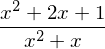

In [54]:
(x**2 + 2*x + 1)/(x**2 + x)

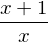

In [55]:
cancel((x**2 + 2*x + 1)/(x**2 + x))

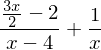

In [56]:
1/x + (3*x/2 - 2)/(x - 4)

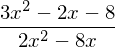

In [57]:
cancel(1/x + (3*x/2 - 2)/(x - 4))

sometimes factor() does the same thing.

# apart()

Perform partial fraction decomposition  (omitted)


# Trigonometry

Sympy uses standard python notation for trigs function

In [58]:
asin(1)

## trigonometric simplification: trigsimp()

like simplify() but for trigonometric functions.

In [59]:
trigsimp(sin(x)**2 + cos(x)**2)

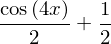

In [60]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [61]:
trigsimp(sin(x)*tan(x)/sec(x))

## expansion : expand_trig()

Note: this will expand everywhere. If only a partial expansion is desired, consider an explicit use of subs.

In [62]:
expand_trig(sin(x + y))

# Powers

## power simplification: powsimp()

In [73]:
x**a*x**b


In [74]:
powsimp(x**a*x**b)

## power expansion: expand_power_exp() and expand_power_base()


In [78]:
expand_power_exp(x**(a+b))

In [79]:
expand_power_base((x*y)**a)  ##not working. should give x^a * y^a

In [80]:
expand_power_base((x*y)**a, force=True) #use more violence on assumptions

# Exponentials and logarithms


In [81]:
ln(x)

Remember that you can specify assumptions when declaring Sympy Symbols:

In [84]:
x, y = symbols('x y', positive=True)
n = symbols("n", real=True)
z, t = symbols("z t") #no assumption taken, for testing

## expand_log()

In [85]:
expand_log(log(x*y))

In [87]:
expand_log(log(x/y))

In [88]:
expand_log(log(x**2))

In [89]:
expand_log(log(x**n))

In [90]:
expand_log(log(z*t))   #remember: we took no assumptions for z and t...

In [91]:
expand_log(log(z*t), force=True)  #..but you can force them.

# logcombine()
inverse expansion

In [92]:
logcombine(log(x)+log(y))

# Other special functions

## factorials


In [93]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')


In [94]:
factorial(n)

In [96]:
factorial(n).subs(n,10)

## Binomial coefficients


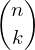

In [100]:
binomial(n,k) #binomial function

In [101]:
gamma(z) #gamma function

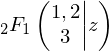

In [102]:
hyper([1,2], [3], z)  #hypergeometric function

## rewrite()

rewrite a functions in terms of one another. 
Syntax: function.rewrite(another_function)

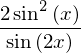

In [103]:
tan(x).rewrite(sin)

In [104]:
factorial(x).rewrite(gamma)

# Simplification of combinatory expressions: combsimp()

In [106]:
n,k = symbols("n k", integer=True)
combsimp(factorial(n)/factorial(n-3))

# Calculus

## Derivatives: diff()

In [107]:
x, y, z = symbols("x y z")

In [108]:
diff(cos(x), x)

In [109]:
diff(exp(x**2), x)

multiple derivatives: just pass additional derivation terms, or the number of derivations:

In [111]:
diff(x**4, x, x, x)

In [112]:
diff(x**4, x, 3)

In [113]:
for n in (1,2,3):
    print(diff(x**4, x, n))

4*x**3
12*x**2
24*x


derivatives with respect to more than one variable at once:


In [114]:
expr = exp(x*y*z)

In [115]:
diff(expr, x, y, y, z, z, z, z)

In [116]:
diff(expr, x, y, 2, z, 4)

alternative syntax, as a method:

In [117]:
expr.diff(x, y, 2, z, 4)

unevaluated derivatives: use Derivative class:

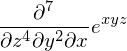

In [119]:
deriv = Derivative(expr, x, y, 2, z, 4)
deriv

that can be evaluated with .doit() method

In [120]:
deriv.doit()

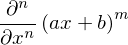

In [122]:
m, n, a, b = symbols("m n a b")
expr = (a*x + b)**m
expr.diff((x,n))

# Integrals

to compute, use integrate(). Can be definite or indefinite.

In [123]:
integrate(cos(x), x)  #indefinite

In [128]:
integrate(exp(-x), (x, 0, oo))  #definite. oo computes as infinite (looks like, after all..)

multiple limits can be passed as tuples:

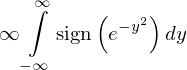

In [129]:
integrate(exp(x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

as for derivatives, unevaluated integrals can be evaluated later with doit() method.

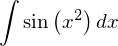

In [131]:
integ = Integral(sin(x**2), x)
integ

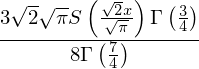

In [132]:
integ.doit()

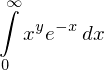

In [134]:
integ = Integral(x**y*exp(-x), (x, 0, oo))
integ

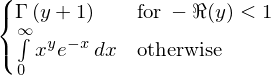

In [135]:
integ.doit()

# Limits: limit()

syntax: limit(a,b,c) with a function evaluated for b that goes to c

In [137]:
limit(sin(x)/x, x, 0)

must be used in place of subs() when the point of evaluation is a singularity

In [138]:
expr = x**2/exp(x)
expr.subs(x,oo)

In [139]:
limit(expr, x, oo)

Can also be left unevaluated, and evaluated later with .doit()

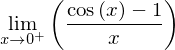

In [141]:
expr = Limit((cos(x)-1)/x, x, 0)
expr

In [142]:
expr.doit()

Can be evaluated on one side only, passing "+" or "-" as an extra argument.

In [143]:
limit(1/x, x, 0, "+")

In [144]:
limit (1/x, x, 0, "-")

# Series expansion

Sympy can compute series expansion of function around a point:
O^n is the Landau order term at x = x0. Can be removed with .removeO()

In [145]:
expr = exp(sin(x))

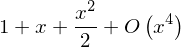

In [147]:
expr.series(x,0,4)  #default power = 6, here is 4.

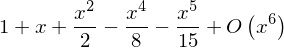

In [149]:
expr.series(x,0)

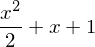

In [150]:
expr.series(x,0,4).removeO()

# Finite difference

In [151]:
f, g = symbols("f g", cls=Function)

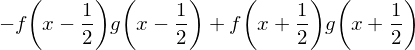

In [152]:
differentiate_finite(f(x)*g(x))

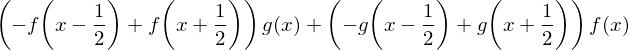

In [153]:
differentiate_finite(f(x)*g(x), evaluate=True)

if you already have a derivative, you can express it .as_finite_difference()

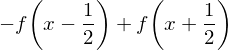

In [155]:
f = Function("f")
dfdx = f(x).diff(x)
dfdx.as_finite_difference()

the first order derivative was approximated around x using a minimum number of points (2 for 1st order derivative) evaluated equidistantly using a step-size of 1.

another way is to use apply_finite_diff(), that takes order,x_list,y_list, and x0 parameters:


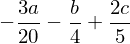

In [156]:
x_list = [-3, 1, 2]
y_list = symbols('a b c')
apply_finite_diff(1, x_list, y_list, 0)

# Solvers

In [158]:
x,y,z = symbols('x y z')
Eq(x,y)   # don't use "x == y" or "x = y"

In [159]:
solveset(Eq(x**2, 1), x)

In [160]:
solveset(Eq(x**2 - 1, 0), x)

In [161]:
solveset(x**2-1, x)  # assume " = 0"

## Algebrical solutions

In [162]:
solveset(x**2 - x, x)

In [165]:
solveset(x -x, x, domain=S.Reals)

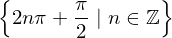

In [166]:
solveset(sin(x)-1, x, domain=S.Reals)

In [167]:
solveset(exp(x), x)  # No solution exists

In [169]:
solveset(cos(x)-x, x)  # Unable to find solutions

## Linear system of equation solutions: linsolve()

1) as a list of equations:

In [171]:
linsolve([x+y+z-1,  x+y+2*z-3], (x,y,z))

2) Augmented Matrix Form:

In [172]:
linsolve(Matrix(([1,1,1,1], [1,1,2,3])), (x,y,z))

3. Ax=b form:

In [173]:
M = Matrix(((1,1,1,1), (1,1,2,3)))
system = A, B = M[:,:-1], M[:,-1]
linsolve(system, x, y, z)

## Non-linear systems of equations: nonlinsolve()

In [174]:
a, b, c, d = symbols('a, b, c, d', real=True)
nonlinsolve([a**2 + a, a - b], [a, b])



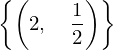

In [175]:
nonlinsolve([x*y - 1, x - 2], x, y)


Only complex solutions present:

In [176]:
nonlinsolve([x**2 + 1, y**2 + 1], [x, y])

# Differential equations

In [177]:
f, g = symbols("f g", cls=Function)
f(x)

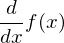

In [178]:
f(x).diff(x)

to represent f''(x)-2f'(x)+f(x)=sin(x) we should do:

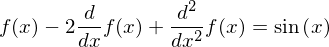

In [180]:
diffeq = Eq(f(x).diff(x,2) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

solution of ODE:

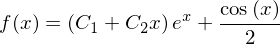

In [182]:
dsolve(diffeq,f(x))

that gives an instance of Eq, as it is a general solution.

# Matrices

Input: a list of row lists

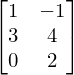

In [186]:
Matrix([[1,-1], [3,4], [0,2]])  # by rows

In [187]:
Matrix([1,2,3]) #a single element list is considered a column vector

In [188]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
M*N


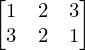

In [189]:
M

In [192]:
M.shape   #note: no ()

In [194]:
M.row(0)

In [195]:
M.col(-1)

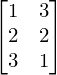

In [196]:
M.T  # Transpose

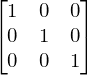

In [197]:
eye(3)

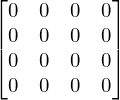

In [198]:
zeros(4)

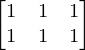

In [199]:
ones(2,3)

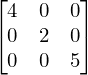

In [200]:
diag(4,2,5)

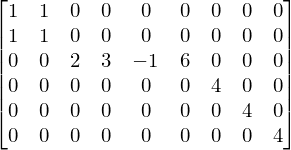

In [204]:
diag(ones(2), Matrix([[2,3,-1,6]]), diag(4,4,4))

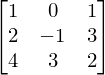

In [208]:
M = Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])
M

In [209]:
M.det()

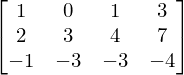

In [210]:
M = Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]])
M

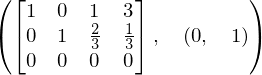

In [211]:
M.rref()  #Reduced Echelon Form, return (matrix, tuple)

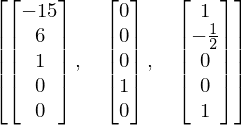

In [212]:
M = Matrix([[1, 2, 3, 0, 0], [4, 10, 0, 0, 1]])
M.nullspace()

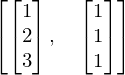

In [213]:
M = Matrix([[1, 1, 2], [2 ,1 , 3], [3 , 1, 4]])
M.columnspace()

In [215]:
M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
M.eigenvals()

#returns "eigenval : algebraic multiplicity" couples

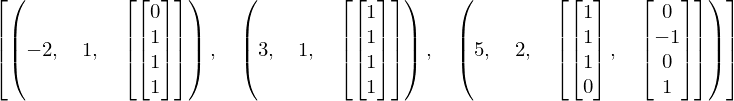

In [216]:
M.eigenvects()
# returns (eigenvalue:alg. multiplicity, [eigenvetors])

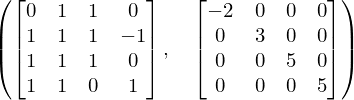

In [218]:
P,D = M.diagonalize()
P,D

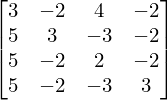

In [219]:
P*D*P**-1

In [220]:
P*D*P**-1 == M

True

NOTE: "lambda" is a reserved keyword in Python. To print lambda symbol just use "lamda", without the b

In [223]:
lamda = symbols("lamda")
p = M.charpoly(lamda)  #characteristic polynomial
factor(p)